# Machine Learning (Modelling)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import drive
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


## The Data

In [2]:
# from pc
df = pd.read_csv('df_model.csv')
df.head()

,Unnamed: 0,Price,Varian,Model,Tahun,Jarak Tempuh,Tipe BBM,Warna,Transmisi,Kapasitas Mesin
0,0,358000000,C250,C-Class,2013,50.000-60.000 km,Bensin,Putih,Automatic Triptonic,>1.500 - 2.000 cc
1,1,995000000,C300,C-Class,2018,0-10.000 km,Bensin,Abu-abu,Automatic,>1.500 - 2.000 cc
2,2,118000000,E260,E-Class,2003,100.000-110.000 km,Bensin,Silver,Automatic Triptonic,>2.000 - 3.000 cc
3,3,1475000000,E300,E-Class,2018,10.000-20.000 km,Bensin,Hitam,Automatic,>2.000 - 3.000 cc
4,4,250000000,C200,C-Class,2012,50.000-60.000 km,Bensin,Putih,Automatic,>1.500 - 2.000 cc


In [0]:
# -------- Import CSV gdrive
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/Data Science Project/ScrapingOLX/df_model.csv')
df.head()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


,Unnamed: 0,Price,Varian,Model,Tahun,Jarak Tempuh,Tipe BBM,Warna,Transmisi,Kapasitas Mesin
0,0,358000000,C250,C-Class,2013,50.000-60.000 km,Bensin,Putih,Automatic Triptonic,>1.500 - 2.000 cc
1,1,995000000,C300,C-Class,2018,0-10.000 km,Bensin,Abu-abu,Automatic,>1.500 - 2.000 cc
2,2,118000000,E260,E-Class,2003,100.000-110.000 km,Bensin,Silver,Automatic Triptonic,>2.000 - 3.000 cc
3,3,1475000000,E300,E-Class,2018,10.000-20.000 km,Bensin,Hitam,Automatic,>2.000 - 3.000 cc
4,4,250000000,C200,C-Class,2012,50.000-60.000 km,Bensin,Putih,Automatic,>1.500 - 2.000 cc


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 10 columns):
Unnamed: 0         1308 non-null int64
Price              1308 non-null int64
Varian             1308 non-null object
Model              1308 non-null object
Tahun              1308 non-null int64
Jarak Tempuh       1308 non-null object
Tipe BBM           1308 non-null object
Warna              1308 non-null object
Transmisi          1308 non-null object
Kapasitas Mesin    1308 non-null object
dtypes: int64(3), object(7)
memory usage: 102.3+ KB


In [4]:
pd.set_option("max_columns",200)
df.drop('Unnamed: 0',axis=1,inplace=True)
df_mod = pd.get_dummies(df,columns=['Varian','Model','Jarak Tempuh','Tipe BBM','Warna','Transmisi','Kapasitas Mesin'],drop_first=True)
df_mod

,Price,Tahun,Varian_A150,Varian_A200,Varian_A250,Varian_B170,Varian_B180,Varian_B200,Varian_C180,Varian_C200,Varian_C200K,Varian_C230,Varian_C230 K,Varian_C240,Varian_C250,Varian_C280,Varian_C300,Varian_C320,Varian_C63 6.2 AMG,Varian_CLA200,Varian_CLA45 AMG,Varian_CLC200,Varian_CLK240,Varian_CLS350,Varian_CLS400,Varian_CLS63 5.5 AMG,Varian_CLS63 AMG,Varian_E200,Varian_E200K,Varian_E220,Varian_E230,Varian_E240,Varian_E250,Varian_E260,Varian_E280,Varian_E300,Varian_E320,Varian_E350,Varian_E400,Varian_E500,Varian_E55,Varian_G300,Varian_G55 AMG,Varian_GL350,Varian_GL400,Varian_GL500,Varian_GLA200,Varian_GLA45 AMG,Varian_GLC250,Varian_GLC300,Varian_GLE250D,Varian_GLE400,Varian_GLE43 AMG,Varian_ML250,Varian_ML270,Varian_ML320,Varian_ML350,Varian_ML400,Varian_New GLS 400 AMG Line,Varian_R300L,Varian_S280,Varian_S300 L,Varian_S320,Varian_S350,Varian_S350 L,Varian_S400,Varian_S400 L,Varian_S500,Varian_S500 L,Varian_S600 L,Varian_SL350,Varian_SLC200,Varian_SLK200,Varian_SLK200K,Varian_SLK230K,Varian_SLK250,Varian_SLK350,Varian_V220,Model_B-Class,Model_C-Class,Model_CLA-Class,Model_CLC-Class,Model_CLK-Class,Model_CLS,Model_CLS-Class,Model_E-Class,Model_G-Class,Model_GL-Class,Model_GLA-Class,Model_GLC-Class,Model_GLE-Class,Model_GLS-Class,Model_ML-Class,Model_R-Class,Model_S-Class,Model_SL-Class,Model_SLC-Class,Model_SLK-Class,Model_V-Class,Jarak Tempuh_10.000-20.000 km,Jarak Tempuh_100.000-110.000 km,Jarak Tempuh_110.000-120.000 km,Jarak Tempuh_120.000-130.000 km,Jarak Tempuh_130.000-140.000 km,Jarak Tempuh_140.000-150.000 km,Jarak Tempuh_150.000-160.000 km,Jarak Tempuh_160.000-170.000 km,Jarak Tempuh_170.000-180.000 km,Jarak Tempuh_180.000-190.000 km,Jarak Tempuh_190.000-200.000 km,Jarak Tempuh_20.000-30.000 km,Jarak Tempuh_30.000-40.000 km,Jarak Tempuh_40.000-50.000 km,Jarak Tempuh_50.000-60.000 km,Jarak Tempuh_60.000-70.000 km,Jarak Tempuh_70.000-80.000 km,Jarak Tempuh_80.000-90.000 km,Jarak Tempuh_90.000-100.000 km,Jarak Tempuh_>200.000 km,Tipe BBM_Diesel,Tipe BBM_Hybrid,Warna_Biru,Warna_Hitam,Warna_Lainnya,Warna_Merah,Warna_Putih,Warna_Silver,Transmisi_Automatic Triptonic,Transmisi_Manual,Kapasitas Mesin_>1.500 - 2.000 cc,Kapasitas Mesin_>2.000 - 3.000 cc,Kapasitas Mesin_>3.000 cc
0,358000000,2013,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1,995000000,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,118000000,2003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
3,1475000000,2018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,250000000,2012,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## Set Features and Target

In [5]:
X = df_mod.drop('Price',axis=1)
y = df_mod['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## MAE, RMSE, and R2 Score from All Algorithm

In [0]:
algorithm = [LinearRegression(), DecisionTreeRegressor(random_state=101), RandomForestRegressor(random_state=101), LGBMRegressor(random_state=101)]
algo_name = ['LinearRegression','DecissionTreeRegressor','RandomForestRegressor','LGBMRegressor']
MAE = []
RMSE = []
R2_Score = []

for model in algorithm:
    mae = np.absolute(cross_val_score(model,X_train,y_train,cv=5,scoring='neg_mean_absolute_error').mean())
    rmse = np.absolute(cross_val_score(model,X_train,y_train,cv=5,scoring='neg_root_mean_squared_error').mean())
    r2 = cross_val_score(model,X_train,y_train,cv=5,scoring='r2').mean()
    MAE.append(mae)
    RMSE.append(rmse)
    R2_Score.append(r2)
 

df_algo = pd.DataFrame({
    'Algorithm' : algo_name,
    'MAE' : MAE,
    'RMSE' : RMSE,
    'R2_Score' : R2_Score,
})

df_algo

,Algorithm,MAE,RMSE,R2_Score
0,LinearRegression,4.158775e+16,4.104564e+17,-1.694088e+18
1,DecissionTreeRegressor,7.935544e+07,2.204110e+08,6.688851e-01
2,RandomForestRegressor,6.811846e+07,1.954878e+08,7.409348e-01
3,LGBMRegressor,9.314647e+07,2.049349e+08,7.260802e-01


> So the best models are RandomForest and LGBM... so next I will tune this two parameters, I do this to get the better result.

> Here we could see some interesting phenomena which is R2_score for LinearRegression is negative. The negative r2 score at linear regression means this model fits the data really poorly.

## Tuning Hyperparameter RandomForest

In [0]:
# --------- Tuning Hyperparameter Random Forest
rf_tuning1 = RandomForestRegressor(random_state=101)

# Hyperparameter for RandomForest
param_model_1 = {
    'n_estimators' : [100,150,200,250],
    'max_depth' : np.arange(3,12),
    'min_samples_split' : [i for i in range(2,13,2)],
    'min_samples_leaf' : [i for i in range(2,13,2)],
    'bootstrap' : [True,False]
}

# Grid Search CV
### model 1
GSCV_model_1 = GridSearchCV(estimator=rf_tuning1,
                     param_grid=param_model_1
                     ,scoring='r2',cv=5)

# Fitting Model 1
GSCV_model_1.fit(X_train,y_train)
prediction_1 = GSCV_model_1.predict(X_test)

print("MAE : ",mean_absolute_error(y_test,prediction_1))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,prediction_1)))
print("R2_Score : ",r2_score(y_test,prediction_1))
print()
print('Random Forest Regressor Best Parameters : ')
print(GSCV_model_1.best_params_)

MAE :  66148194.93014232
RMSE :  148579233.3999477
R2_Score :  0.8507351552286064

Random Forest Regressor Best Parameters : 
{'bootstrap': True, 'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 250}


## Tuning Hyperparameter LGBM

In [0]:
lgbm_tuning2 = LGBMRegressor(random_state=101)

# Hyperparameter for Light GBM Classifier
param_model_2 = {
    'max_depth' : [-1,2,6,7,9,14,20,23,30],
    'num_leaves' : [7,14,31,70,120,300],
    'min_data_in_leaf' : [60,100,120],
    'learning_rate' : [0.001,0.01,0.05],
    'num_iterations' :[200,400,600]
}

# Grid Search CV
### model 2
GSCV_model_2 = GridSearchCV(estimator=lgbm_tuning2,
                     param_grid=param_model_2
                     ,scoring='r2',cv=5)

# Fitting Model 2
GSCV_model_2.fit(X_train,y_train)
prediction_2 = GSCV_model_2.predict(X_test)

print("MAE : ",mean_absolute_error(y_test,prediction_2))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,prediction_2)))
print("R2_Score : ",r2_score(y_test,prediction_2))
print()
print('LGBM Regressor Best Parameters : ')
print(GSCV_model_2.best_params_)

MAE :  88858530.65496495
RMSE :  194832197.4792851
R2_Score :  0.743337296260374

LGBM Regressor Best Parameters : 
{'learning_rate': 0.05, 'max_depth': -1, 'min_data_in_leaf': 60, 'num_iterations': 600, 'num_leaves': 14}


## Best Model Evaluation

In [6]:
rf = RandomForestRegressor(random_state=101,max_depth=11,min_samples_leaf=2,min_samples_split=10,n_estimators=250)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)

print("Data range from %d to %d" %(min(y_test),max(y_test)))

print("MAE : ",mean_absolute_error(y_test,pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,pred)))
print("R2_Score : ",r2_score(y_test,pred))

Data range from 28000000 to 3500000000
MAE :  66148194.93014232
RMSE :  148579233.3999477
R2_Score :  0.8507351552286064


> This model using this hyperparameter showing very good results. With price data range from 28M to 3.5B, it gives RMSE only 148M and MAE only 66M. And, for r2 score, it gives r2_score 0.85, which means this model fits good with the data, because r2 score tells how well the regression predictions approximate the real data points.

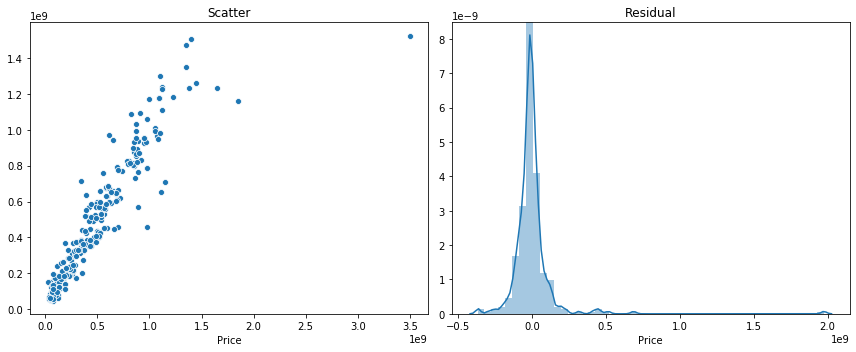

In [8]:
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(y_test,pred)
plt.title('Scatter')

plt.subplot(1,2,2)
sns.distplot(y_test-pred)
plt.title('Residual')

plt.tight_layout()

> Here we could see that the residual looks good, but there are some datas (not much) that have bad prediction. It, could be happened because the data that predicted only one data from a varian / class mercedes benz. SO, it may not icluded when train the data, but included when test the data. From EDA, there are some car class datas that only have 2 or 1 item.

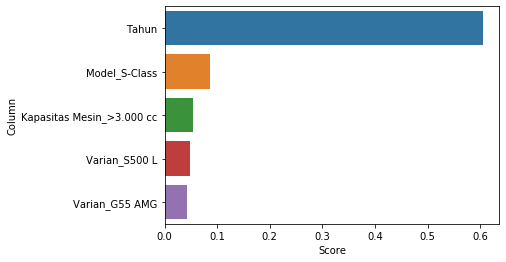

In [12]:
# feature importances
score = pd.DataFrame(rf.feature_importances_, columns=['Score'])
score['Column'] = X.columns
score.head()

# Make plot feature importances
new_score = score.sort_values(by='Score',ascending=False)
sns.barplot(data=new_score[:5],x='Score',y='Column')

## Best Model Validation

In [18]:
# Try to validate using X_train data

from sklearn.model_selection import KFold
kf = KFold(n_splits=20,random_state=101)

MAE = []
RMSE = []
R2_Score = []

for train_index , test_index in kf.split(X_train,y_train):
    X_train_kf,X_test_kf,y_train_kf,y_test_kf = X_train.iloc[train_index],X_train.iloc[test_index],y_train.iloc[train_index],y_train.iloc[test_index]
    model = RandomForestRegressor(random_state=101,max_depth=11,min_samples_leaf=2,min_samples_split=10,n_estimators=250)
    model.fit(X_train_kf,y_train_kf)
    #prediction
    pred = model.predict(X_test_kf)
    #evaluation
    MAE.append(round(mean_absolute_error(y_test_kf,pred),2))
    RMSE.append(round(np.sqrt(mean_squared_error(y_test_kf,pred)),2))
    R2_Score.append(round(r2_score(y_test_kf,pred),2))
    
    
df_fold = pd.DataFrame({
    "MAE" : MAE,
    "RMSE" : RMSE,
    "R2_Score" : R2_Score
})

df_fold

,MAE,RMSE,R2_Score
0,4.507770e+07,6.318830e+07,0.95
1,6.342408e+07,1.250992e+08,0.86
2,6.539880e+07,1.101633e+08,0.88
3,7.103272e+07,1.083931e+08,0.88
4,1.017652e+08,3.211378e+08,0.65
5,7.192781e+07,1.148686e+08,0.91
6,1.200209e+08,4.589969e+08,0.51
7,8.275209e+07,1.480278e+08,0.83
8,5.261060e+07,9.764981e+07,0.95
9,1.086385e+08,3.118323e+08,0.63


In [20]:
print("MAE mean from 20 fold : ",round(df_fold["MAE"].mean(),2))
print("RMSE mean from 20 fold : ",round(df_fold["RMSE"].mean(),2))
print("R2_score mean from 20 fold : ",round(df_fold["R2_Score"].mean(),2))

MAE mean from 20 fold :  75050559.38
RMSE mean from 20 fold :  162672183.43
R2_score mean from 20 fold :  0.82


> I think it still have good result when validate this model with 20 Fold... But, this model absolutely need to improve again with add more data, because at the fold table we could see it shows not good statbility when predicting the data. **Since my main objective is to do web scraping, and doing some additional EDA and modelling, after looking this model is pretty good, I will stop here and not to continue to make this model nearly to pefect.**